# MVP Análise de Dados e Boas Práticas

**Nome:** Eric Thomaz Altines Figueiredo

**RA:** 4052025000182


**Dataset:** [Students' Social Media Addiction](https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships) / Foi feito downloado e disponibilizado no Github: [Dataset Github (.csv)](https://raw.githubusercontent.com/ericthomazaf/Datasets/refs/heads/main/Students%20Social%20Media%20Addiction.csv)

# Descrição do problema

O dataset escolhido para a construção do MPV traz dados sobre: "Uma pesquisa entre países sobre padrões de uso, impacto acadêmico e relacionamento" segundo a documentação do oficial, disponível no link supracitado.

**Condições dos dados**: Este dataset apresenta algumas restrições que devem ser consideradas na análise. Primeiramente, a amostra é um recorte limitada a estudantes e foi coletada por meio de um questionário de autoavaliação, o que pode introduzir viés de percepção. Não há informação sobre o local de coleta nem o ano, o que dificulta a contextualização.

O uso excessivo de redes sociais entre estudantes é um reflexo direto da chamada economia da atenção, em que as plataformas digitais competem pelo foco dos usuários. Por meio de mecanismos sofisticados como algoritmos de recomendação, rolagem infinita e notificações constantes, essas plataformas são projetadas para reter a atenção por longos períodos, muitas vezes de forma inconsciente e nociva ao usuário.

Essa dinâmica resulta não apenas em um aumento do tempo de exposição diária às redes, mas também em uma sobrecarga de estímulos e exposição excessiva a propagandas e conteúdos patrocinados, que podem influenciar o comportamento, os hábitos de consumo e a saúde emocional. Este MVP busca investigar se o uso intensivo impacta aspectos fundamentais da vida de estudantes, como a saúde mental, o desempenho acadêmico e a qualidade dos relacionamentos interpessoais, a partir de dados que refletem o cotidiano e os padrões de comportamento digital desse público.



## Hipoteses do problema

* Estudantes com uso excessivo de redes sociais apresentam níveis mais baixos de saúde mental;
* O uso excessivo de redes sociais está associado à percepção de que o desempenho acadêmico é prejudicado;
* Estudantes que passam mais tempo nas redes sociais tendem a ter mais conflitos relacionados a redes sociais em seus relacionamentos.

## Seleção de Dados

O dataset Students Social Media Addiction é um conjunto de dados disponível publicamente que reúne informações sobre o comportamento de estudantes em relação ao uso de redes sociais. Ele foi obtido de uma plataforma aberta (como Kaggle) e contém dados já organizados e prontos para análise. Isso elimina a necessidade de uma etapa complexa de coleta externa, permitindo iniciar diretamente o processo de limpeza, exploração e pré-processamento dos dados para fins de aprendizado de máquina ou análise exploratória.

## Atributos do Dataset

O dataset contém diversas variáveis relacionadas ao uso de redes sociais e seus possíveis efeitos na vida dos estudantes. As principais colunas presentes são:

* Student_ID – identificador único do aluno
* Age – idade do estudante
* Gender – gênero (Male, Female)
* Academic_Level – nível educacional (High School, Undergraduate, Graduate)
* Country – país de origem
* Avg_Daily_Usage_Hours – tempo médio de uso diário de redes sociais (em horas)
* Most_Used_Platform – plataforma de rede social mais utilizada (Instagram, TikTok, YouTube etc.)
* Affects_Academic_Performance – se o uso afeta o desempenho acadêmico (Yes/No)
* Sleep_Hours_Per_Night – horas de sono por noite
* Mental_Health_Score – pontuação de saúde mental (escala de 1 a 10)
* Relationship_Status – status de relacionamento (Single, In Relationship, Complicated)
* Conflicts_Over_Social_Media – número de conflitos ocorridos por causa das redes sociais
* Addicted_Score – pontuação de vício em redes sociais (escala de 1 a 10)

# Importação de bibliotecas necessárias e Carga de Dados



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [37]:
url = 'https://raw.githubusercontent.com/ericthomazaf/Datasets/refs/heads/main/Students%20Social%20Media%20Addiction.csv'

df = pd.read_csv(url)

# Análise de Dados

## Primeiras informações do dataset:
Número de linhas e colunas
Tipos de variáveis

In [38]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


Da função 'df.info( )' tiramos algumas informações básicas iniciais:
* 705 linhas/eventos, ou seja, 705 estudantes analisados;
* 13 Colunas com todas as colunas com 705 valores não nulos, todas estão completas;
* Tipos de dados por colunas:
 **int64**: inteiros; **float64**: decimais; **object**: Dados categóricos (strings).

## Estatísticas descritivas

Estatísticas descritivas básicas do dataset

In [39]:
# Estatísticas descritivas básicas das variáveis com valores numéricos
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


Aqui já conseguimos entender algumas coisas sobre o perfil dos estudantes que o dataset traz, como:
* Idade (**Age**): **Idade Máxima**: 24; **Idade mínima**: 18; **std**: 1.39. Logo, nossos estudantes então em uma faixa de idade universitária ou pré universitária;
* Tempo de uso diário (**Avg_Daily_Usage_Hours**): **média**: 4.91h; **75%** dos estudantes usam as redes mais do que 4.1h. Indica que a **maioria tem um uso intenso** com uma média próxima a 5h/dia.
* Saúde mental (**Mental_Health_Score**): **Média**: 6.22; **std**: 1.10. Pontuação até razoável, mas que pode nos permitir investigação de fatores.

## Média

Cálculo da média de cada variável numérica. Médias são medidas estatísticas sensíveis a outliers, podendo não refletir muito bem a realidade.

In [40]:
df.describe().loc['mean']

,mean
Student_ID,353.000000
Age,20.659574
Avg_Daily_Usage_Hours,4.918723
Sleep_Hours_Per_Night,6.868936
Mental_Health_Score,6.226950
Conflicts_Over_Social_Media,2.849645
Addicted_Score,6.436879


## Desvio padrão

Medida de indica o quanto os dados fogem à média.

In [41]:
df.describe().loc['std']

,std
Student_ID,203.660256
Age,1.399217
Avg_Daily_Usage_Hours,1.257395
Sleep_Hours_Per_Night,1.126848
Mental_Health_Score,1.105055
Conflicts_Over_Social_Media,0.957968
Addicted_Score,1.587165


Os desvios padrões das variáveis estão bem próximos à média, indicando pouca dispersão dos dados.

## Tratamento de valores nulos

O dataset não possui valores nulos. Porém, vamos fazer o processo de preenchimento de valores nulos com a média.

In [42]:
# não tem valores nulos em nenhuma variável de df
df.isnull().sum()

# caso tivesse a presença de valores nulos, poderíamos preenchê-los com a média da variável no caso de valores numéricos da seguinte forma:
df.fillna(df.mean(numeric_only=True), inplace=True)

# df.mean(numeric_only=True) → calcula a média apenas das colunas numéricas
# df.fillna(...) → preenche os NaN com a média correspondente
# inplace=True → aplica diretamente no df sem precisar criar uma cópia

display(df)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


## Gráficos de barras

Vamos utilizar o gráfico de barras para visualizar a distribuição das variáveis categóricas.

/tmp/ipython-input-43-2355949065.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i], palette='viridis') #Paleta de cores retiradas da documentação oficial da biblioteca Seaborn
/tmp/ipython-input-43-2355949065.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i], palette='viridis') #Paleta de cores retiradas da documentação oficial da biblioteca Seaborn
/tmp/ipython-input-43-2355949065.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

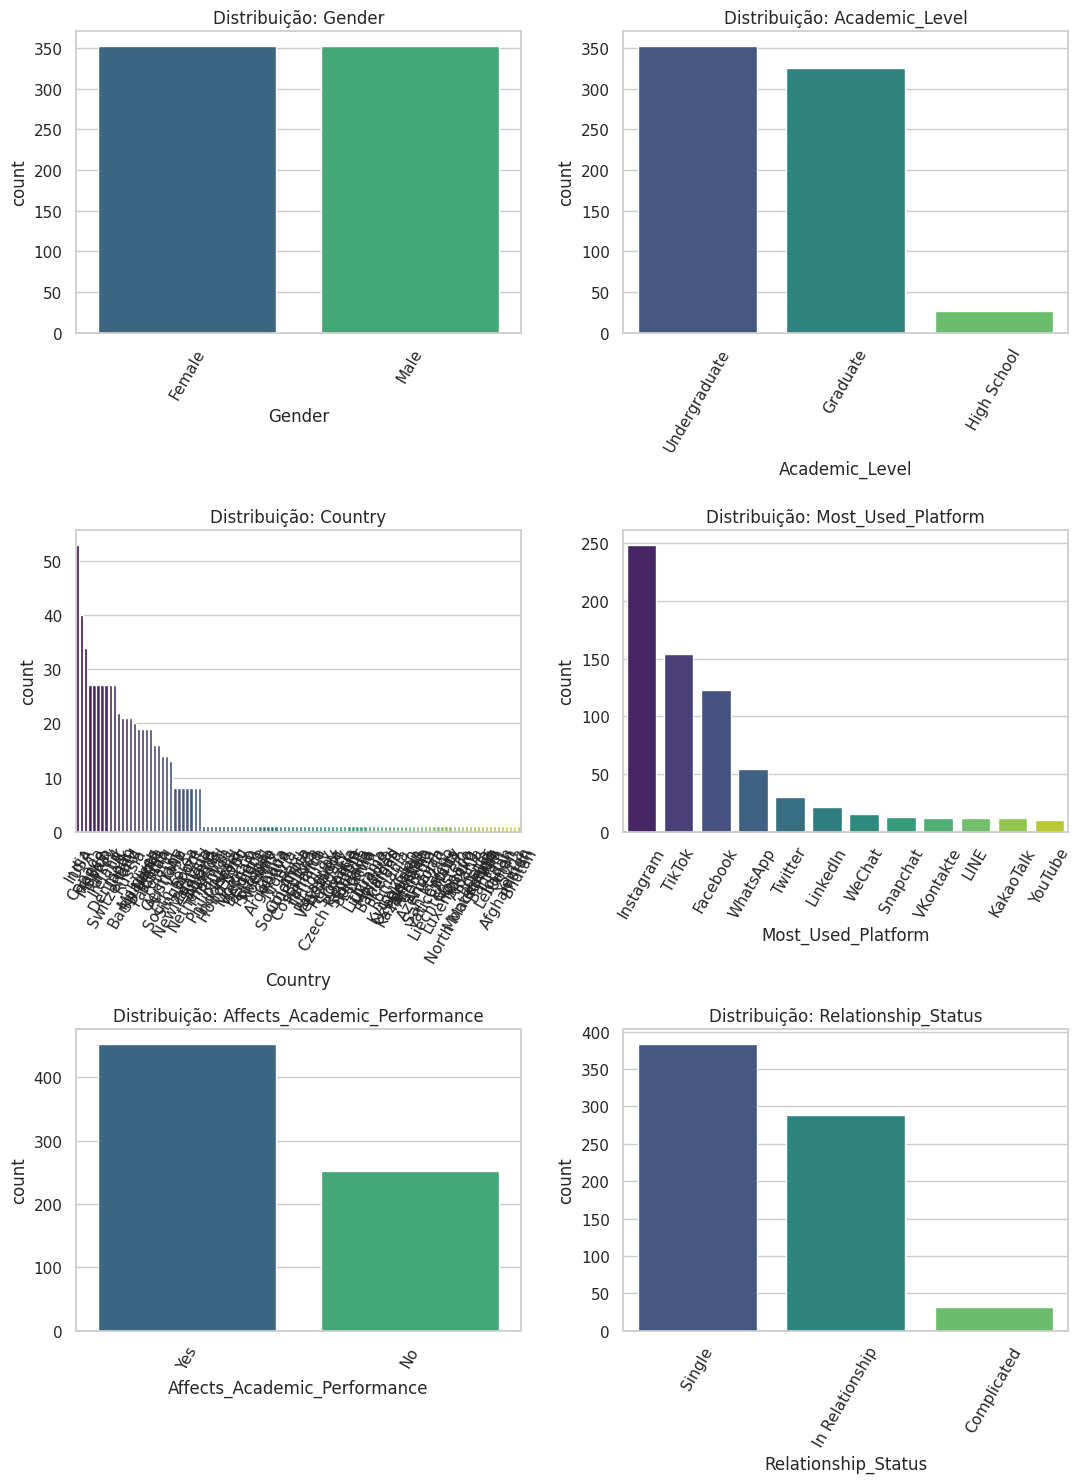

In [43]:
# Selecionar apenas as colunas categóricas
categorical_cols = df.select_dtypes(include='object').columns

# Configurando o grid
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, 5 * n_rows))
axes = axes.flatten()

# Criar gráficos com paleta Set3
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i], palette='viridis') #Paleta de cores retiradas da documentação oficial da biblioteca Seaborn
    axes[i].set_title(f'Distribuição: {col}')
    axes[i].tick_params(axis='x', rotation=60)

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Gender**: A distribuição entre homens e mulheres está equilibrada. Podemos considerar isso é bom, pois evita viés de gênero nas análises e nos modelos.

**Academic_Level**: A maioria dos estudantes está no nível Undergraduate (Graduação) e Graduate (Pós). Poucos são do High School. Isso pode influenciar o comportamento de uso das redes (por exemplo, graduação pode estar mais exposta a pressão acadêmica ou uso mais intenso de redes).

**Country**: Um ponto de atenção é o gráfico de barras sobre os países, pela pesquisa ter muitos países diferentes, vamos plotar um novo gráfico com apenas os 10 países com maior número de indivíduos.

**Most_Used_Platform**: As plataformas mais populares são Instagram, TikTok e Facebook. O que faz sentido considerando o desing dessas plataformas para prender a atenção do usuário.

**Affects_Academic_Performance**: A maioria respondeu "Yes", ou seja, reconhece que o uso de redes sociais afeta o desempenho acadêmico. Pode haver uma relação direta com notas, tempo de uso e sono. Essa variável pode ser uma variável explicativa.

**Relationship_Status**: A maioria está Single, seguido por In Relationship.Poucos se declaram Complicated. O status de relacionamento pode influenciar o tempo nas redes ou os conflitos (como ciúmes ou mensagens não respondidas).



/tmp/ipython-input-44-1774511807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Country'].isin(top_paises)], x='Country', order=top_paises, palette='viridis')


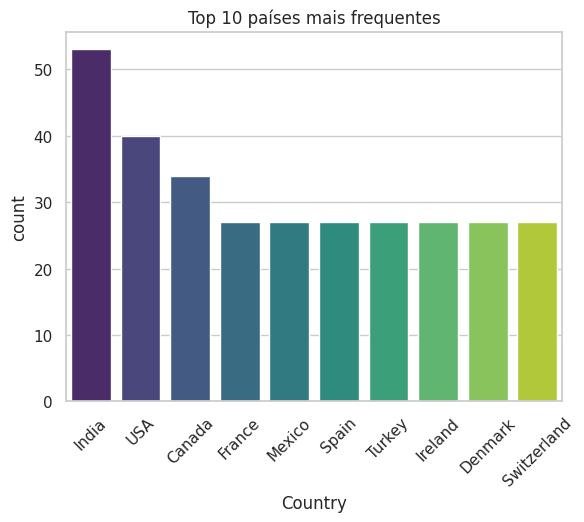

In [44]:
# Novo gráfico com apenas os top 10 países

top_paises = df['Country'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Country'].isin(top_paises)], x='Country', order=top_paises, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 países mais frequentes')
plt.show()

## Histogramas

Vamos utilizar os histogramas para visualizar a distribuição das variáveis numéricas

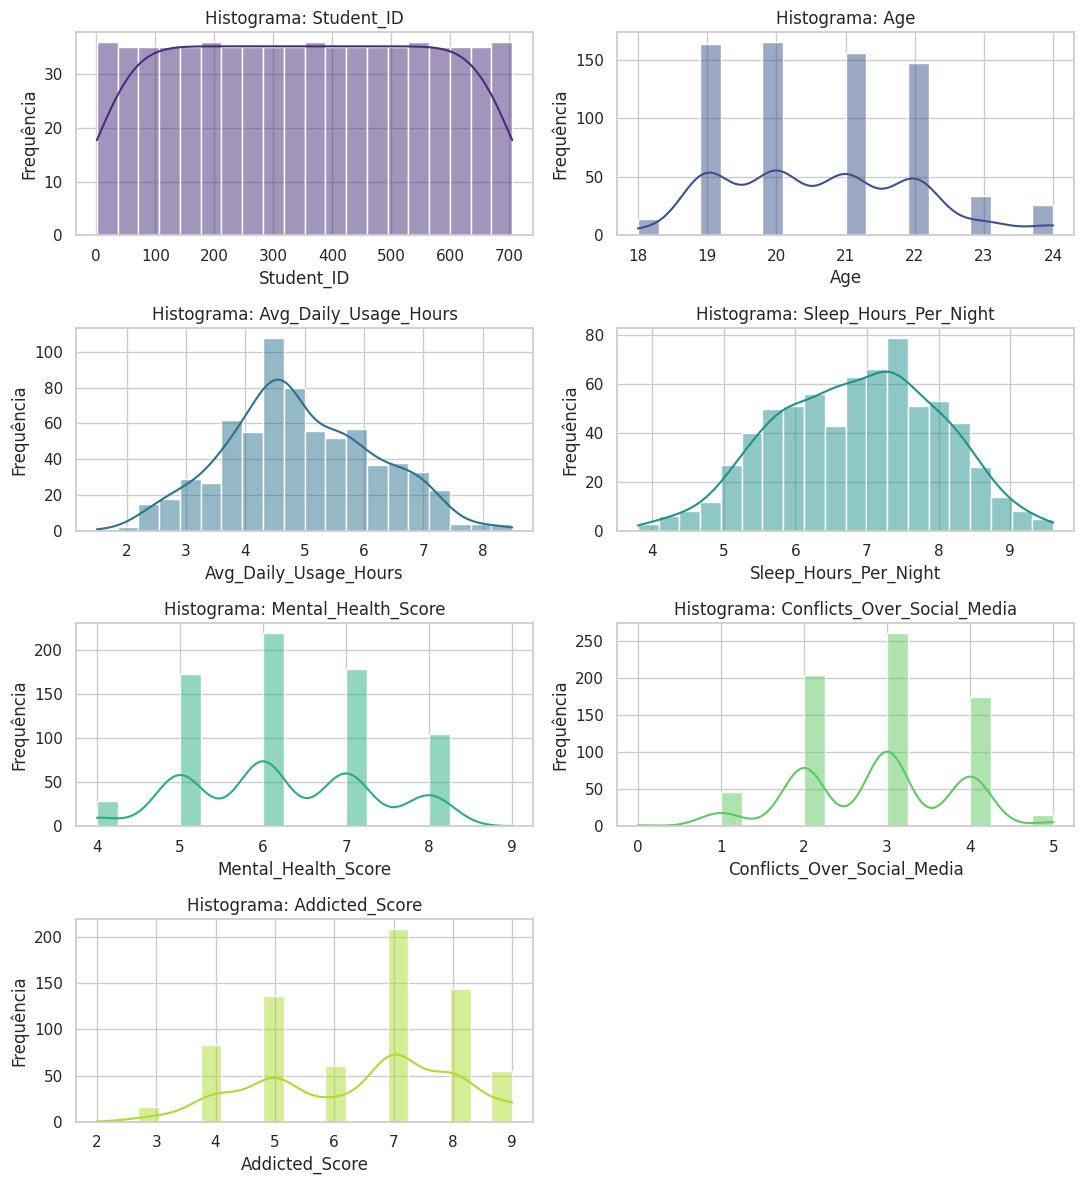

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Definir paleta de cores Set3 com número adequado de cores
colors = sns.color_palette("viridis", len(numeric_cols))

# Configurar grid
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, 3 * n_rows))
axes = axes.flatten()

# Gerar histogramas
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Histograma: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remover eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Age**: Idades variam entre 18 e 24 anos. Maioria entre 19 e 22 anos — indica um público predominantemente universitário. Corroborando com maior número de indivíduos na graduação ou pós graduação.

**Avg_Daily_Usage_Hours**: Distribuição próxima da normal. Pico entre 4 e 6 horas por dia, com alguns usando mais de 8h. Potencial indicador de vício.

**Sleep_Hours_Per_Night**: Distribuição também próxima da normal. Maioria dorme entre 6 e 8 horas, o que é saudável. Importante observar a relação com tempo de uso e saúde mental.

**Mental_Health_Score**: Escala discreta (valores inteiros), concentrada entre 5 e 8. Aparentemente sem valores extremos, o que é bom. Podemos cruzar com **Avg_Daily_Usage_Hours** para ver impacto das redes na saúde mental.

**Conflicts_Over_Social_Media**: Distribuição discreta (valores de 0 a 5). Pico em 3 conflitos. Boa parte dos alunos relatam múltiplos conflitos — isso pode ser fortemente relacionado com o vício.

**Addicted_Score**: Distribuição levemente assimétrica, concentrada entre 5 e 8.
Isso indica que a maioria dos estudantes apresenta nível moderado a alto de vício.

## Boxplot

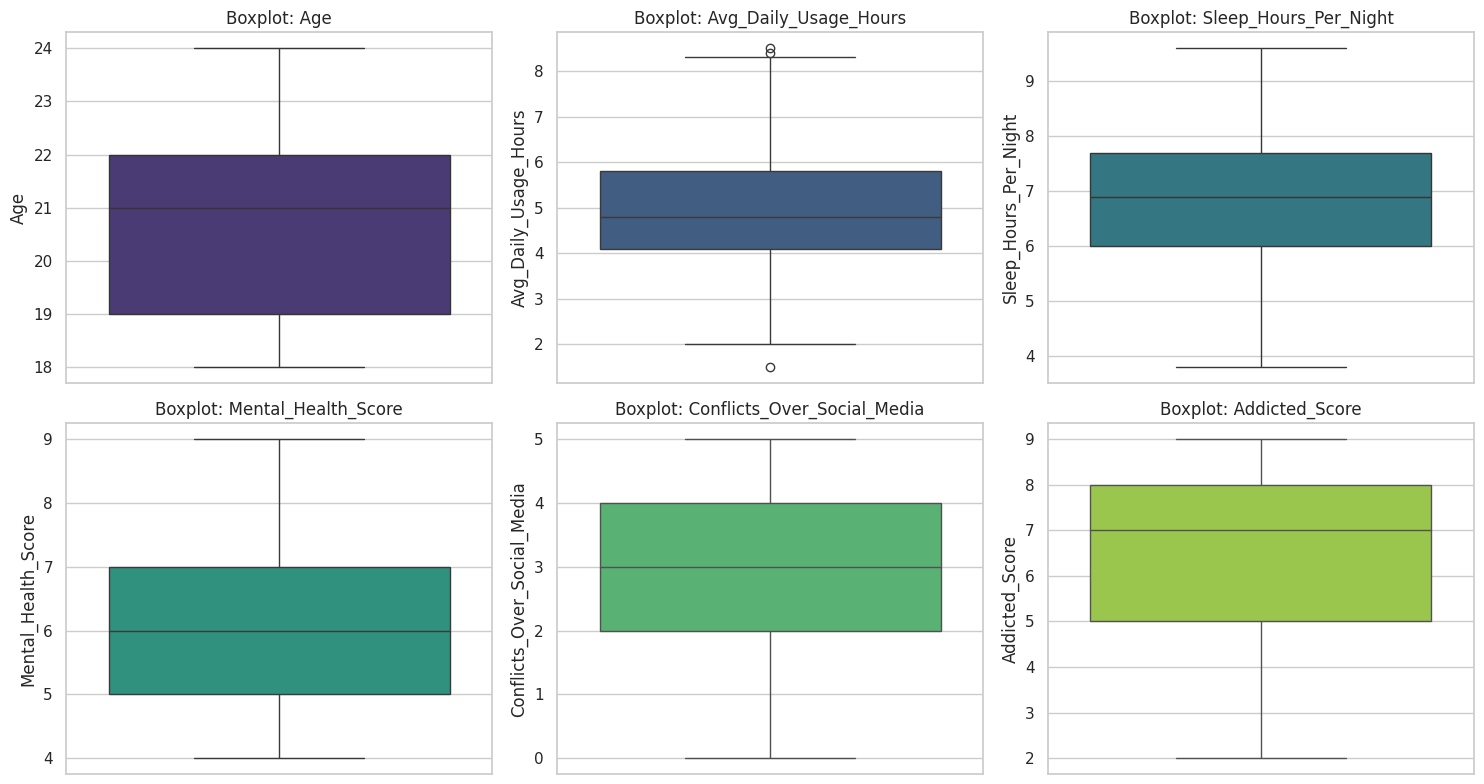

In [46]:
# Definir estilo do seaborn
sns.set(style="whitegrid", palette="viridis")

# Selecionar apenas colunas numéricas (ignorando Student_ID)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='Student_ID').columns

# Criar subplots
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)  # divisão arredondada para cima

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, y=col, color=sns.color_palette("viridis", len(numeric_cols))[i-1])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

plt.show()


**Age**: Distribuição centrada entre 19 e 22 anos. Sem outliers visíveis.

**Avg_Daily_Usage_Hours**: A mediana está entre 4 e 5 horas. Existem 'outliers' acima de 8 horas, como é algo possível de acontecer, vou ignorar como outliers. Alunos com uso excessivo podem estar em risco de dependência.

**Sleep_Hours_Per_Night**: Mediana perto de 7h por noite. Alguns outliers abaixo de 4h — possível sinal de privação de sono. Cruzar com **Avg_Daily_Usage_Hours** e **Mental_Health_Score** pode ser relevante.

**Mental_Health_Score**: Leve assimetria à direita (valores mais concentrados entre 5 e 7). Poucos outliers. Pode ser uma variável dependente ou preditora importante.

**Conflicts_Over_Social_Media**: Valores discretos e bem distribuídos (de 0 a 5). Sem outliers, mas com grande dispersão. Pode ser um bom preditor de Addicted_Score.

**Addicted_Score** Mediana em torno de 7. Alguns outliers baixos (possivelmente pessoas com perfil muito diferente). Boa variabilidade para regressão.



## Matriz de correlação

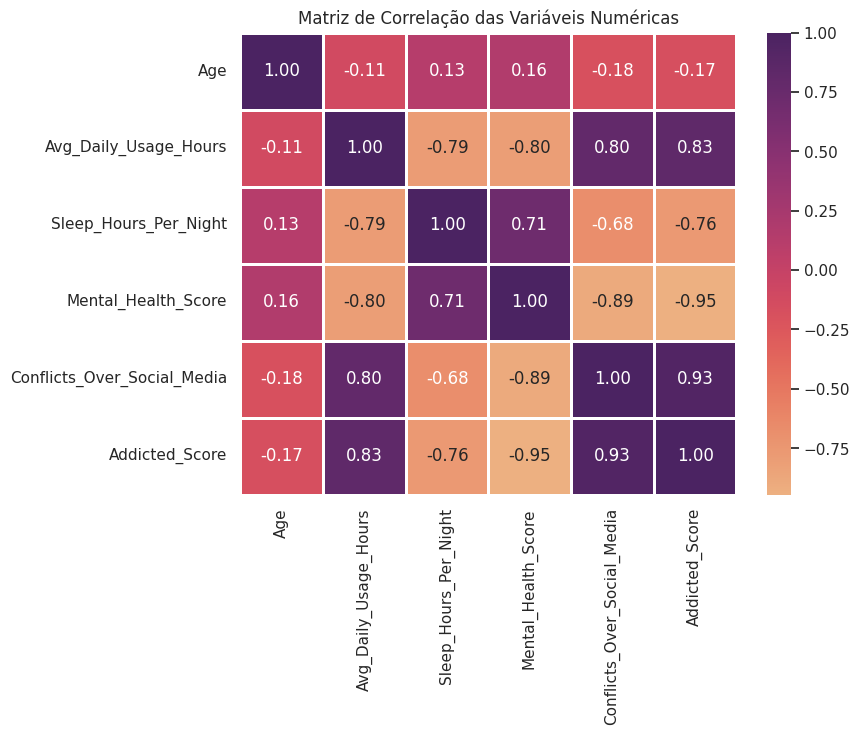

In [61]:
# Selecionar apenas colunas numéricas (sem 'Student_ID')
numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlation_matrix = numericas.corr()

# Plotar o heatmap com paleta flare
plt.figure(figsize=(8 , 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap= 'flare', linewidths=2)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


Variável	Correlação	Interpretação

Este dataset está em sua maioria com fortes correlações entre si, com excessão da idade (para minha surpresa pessoal).
O ponto de observação maior nesta matriz de correlação é que quanto maior as horas de uso das redes, menor a quantidade de sono, menor a pontuação de saúde mental.
Esses comportamentos são esperados dada experiências pessoais/individuais, mas a amostra de 705 estudantes corrobora fortemente com o argumento.

# Pré processamento de Dados

* Nesta etapa do processo, vamos analisar se ainda vamos utilizar eliminar alguma variável que não faça sentido;
* Codificação de variáveis categóricas;
* Separação do conjunto de treino e conjunto de teste.

## Exclusão de variáveis desnecessárias

In [48]:
#Duplicar o dataset para BackUp
df_pre_processamento = df

df_pre_processamento.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Academic_Level,object
Country,object
Avg_Daily_Usage_Hours,float64
Most_Used_Platform,object
Affects_Academic_Performance,object
Sleep_Hours_Per_Night,float64
Mental_Health_Score,int64


Vamos eliminar duas variáveis, sendo elas:
* Student_ID: É um identificador único que não possui relação com os demais dados;
* Country: Aumenta a dimensionalidade sem necessariamente agregar valor ao dataset.

In [49]:
df_pre_processamento.drop(columns='Student_ID', inplace=True)
df_pre_processamento.drop(columns='Country', inplace=True)
df_pre_processamento.head()

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## Codificação de variáveis categóricas

Como estamos preparando o dataset para posteriormente ser aplicadas técnicas de ML, é parte importante do processo que transformemos as variáveis categóricas em numéricas com técnicas de codificação.

A escolha da técnica utilizada dependerá da natureza dos dados, se a variável apresenta uma certa ordem a ser seguida ou não.

---

Variáveis que precisam de codificação:

* Gender: Famele;
* Academic_Level;
* Most_Used_Platform;
* Affects_Academic_Performance;
* Relationship_Status.


In [50]:
# Transformando a variável Gender, Academic_Level e Affects_Academic_Performance em numérica com o .loc[]

#Variável Gender
df_pre_processamento.loc[df_pre_processamento['Gender'] == 'Female', 'Gender'] = 1
df_pre_processamento.loc[df_pre_processamento['Gender'] == 'Male', 'Gender'] = 0

#Variável Academic_Level
df_pre_processamento.loc[df_pre_processamento['Academic_Level'] == 'High School', 'Academic_Level'] = 0
df_pre_processamento.loc[df_pre_processamento['Academic_Level'] == 'Graduate', 'Academic_Level'] = 1
df_pre_processamento.loc[df_pre_processamento['Academic_Level'] == 'Undergraduate', 'Academic_Level'] = 2

#Affects_Academic_Performance
df_pre_processamento.loc[df_pre_processamento['Affects_Academic_Performance'] == 'Yes', 'Affects_Academic_Performance'] = 1
df_pre_processamento.loc[df_pre_processamento['Affects_Academic_Performance'] == 'No', 'Affects_Academic_Performance'] = 0

df_pre_processamento.head()

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,1,2,5.2,Instagram,1,6.5,6,In Relationship,3,8
1,22,0,1,2.1,Twitter,0,7.5,8,Single,0,3
2,20,1,2,6.0,TikTok,1,5.0,5,Complicated,4,9
3,18,0,0,3.0,YouTube,0,7.0,7,Single,1,4
4,21,0,1,4.5,Facebook,1,6.0,6,In Relationship,2,7


In [51]:
# Transformando as variáveis Most_Used_Platform e Relationship_Status em numérica

# One-Hot Encoding com drop_first=True para evitar multicolinearidade
df_pre_processamento = pd.get_dummies(df_pre_processamento, columns=['Most_Used_Platform', 'Relationship_Status'], drop_first=True)

# Garantir que as colunas geradas estejam em formato numérico (int)
bool_cols = df_pre_processamento.select_dtypes(include='bool').columns
df_pre_processamento[bool_cols] = df_pre_processamento[bool_cols].astype(int)

# Verificar resultado
display(df)

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,1,2,5.2,Instagram,1,6.5,6,In Relationship,3,8
1,22,0,1,2.1,Twitter,0,7.5,8,Single,0,3
2,20,1,2,6.0,TikTok,1,5.0,5,Complicated,4,9
3,18,0,0,3.0,YouTube,0,7.0,7,Single,1,4
4,21,0,1,4.5,Facebook,1,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...
700,20,1,2,4.7,TikTok,0,7.2,7,In Relationship,2,5
701,23,0,1,6.8,Instagram,1,5.9,4,Single,5,9
702,21,1,2,5.6,WeChat,1,6.7,6,In Relationship,3,7
703,24,0,1,4.3,Twitter,0,7.5,8,Single,2,4


## Separação de treino e teste

Para porteriormente utilizar o dataset em ML, vamos separar o conjunto de treino e o conjunto de teste

In [52]:
X = df_pre_processamento.drop('Affects_Academic_Performance', axis=1)  # Dados de entrada
y = df_pre_processamento['Affects_Academic_Performance']               # Alvo (o que queremos prever)

# 20% vai para teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver resultado
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

Treino: (564, 21)
Teste: (141, 21)
